In [1]:
mp_pdf = False
import sys, os
import django
if mp_pdf:
    extension = "pdf"
    import matplotlib
    matplotlib.use('pgf')
    pgf_with_latex = {
        "text.usetex": True,            # use LaTeX to write all text
        "pgf.rcfonts": False,           # Ignore Matplotlibrc
        "text.latex.unicode": True,
        "pgf.preamble": [
            #r"\usepackage[utf8x]{inputenc}",
            r"\usepackage{xcolor}"
        ],
        "pgf.texsystem" : "xelatex",
        "figure.figsize": [12,7]
    }
    matplotlib.rcParams.update(pgf_with_latex)
else:
    extension = "png"
    
import matplotlib as mpl

sys.path.append('/home/max/software/django-tmv/tmv_mcc-apsis/BasicBrowser')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *


dsize = 7.0866142
run_id=1861
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from adjustText import adjust_text, get_renderer, get_bboxes
import operator

mpl.rcParams['font.size'] = 6

In [2]:
plt.rc('font')

In [32]:
mdf = pd.read_csv(f'../tables/newness_representation_{run_id}.csv')
mdf.head()

mdf[mdf['primary_wg']==3].head()

,ipcc_coverage,ipcc_score,ipcc_share,primary_wg,score,share,title,deviation,abs_md,representation,ys,year_av
1,0.084880,13.818819,0.004365,3,344.549708,0.007413,"{storage, cc, project}",-0.003048,0.003048,0.588807,0.426327,4.666667
11,0.057254,5.109617,0.001614,3,242.393157,0.005215,"{building, design, construction}",-0.003601,0.003601,0.309472,0.351619,4.777778
17,0.069374,9.979984,0.003152,3,288.720236,0.006212,"{fuel, fossil, engine}",-0.003060,0.003060,0.507465,0.430553,4.500000
23,0.070408,2.777576,0.000877,3,149.954634,0.003226,"{biochar, amendment, pyrolysis}",-0.002349,0.002349,0.271932,0.278057,4.758621
29,0.193790,32.019715,0.010114,3,330.389047,0.007109,"{country, develop, international}",0.003006,0.003006,1.422805,0.421914,4.531915


In [4]:
topic_dis_df = pd.read_csv(f'../tables/topic_discipline_{run_id}.csv')
topic_dis_df = topic_dis_df.rename(columns={"dis_share":"dis_score"})

topic_dis_df['dis_total'] = topic_dis_df.groupby('title')['dis_score'].transform('sum')

topic_dis_df['dis_share'] = topic_dis_df['dis_score'] / topic_dis_df['dis_total']

topic_dis_df.head()

,dis_score,doctopic__doc__wc__oecd,primary_wg,title,dis_share_pre,dis_share_post,dis_total,dis_share
0,98.609781,Agricultural Sciences,2,"indices, indices, correlation and relationships",45.168047,53.441733,1028.065952,0.095918
1,185.606297,Engineering and Technology,2,"indices, indices, correlation and relationships",73.102808,112.503490,1028.065952,0.180539
2,2.184284,Humanities,2,"indices, indices, correlation and relationships",0.756985,1.427299,1028.065952,0.002125
3,13.903700,Medical and Health Sciences,2,"indices, indices, correlation and relationships",5.620609,8.283041,1028.065952,0.013524
4,655.278080,Natural Sciences,2,"indices, indices, correlation and relationships",310.473621,344.804458,1028.065952,0.637389


In [5]:
topic_dis_wide = topic_dis_df.pivot_table(
    index=["title"],columns="doctopic__doc__wc__oecd",values="dis_share"
).reset_index()

topic_dis_wide.head()

doctopic__doc__wc__oecd,title,Agricultural Sciences,Engineering and Technology,Humanities,Medical and Health Sciences,Natural Sciences,Social Sciences
0,"(e)-vehicles, electric, hybrid and combustion ...",0.017059,0.569020,0.002428,0.006232,0.247428,0.154439
1,"CH4, CH4",0.204914,0.166121,0.000209,0.003133,0.618849,0.006607
2,"CLC, chemical looping combustion (CLC)",0.035575,0.512716,0.001255,0.004690,0.426735,0.017448
3,"CO2 storage, geological CO2 storage",0.047830,0.484719,0.001622,0.004390,0.434192,0.026446
4,"CO2, CO2",0.084190,0.363998,0.000726,0.002875,0.527574,0.019829


In [6]:
df = pd.concat([mdf.sort_values('title').reset_index(drop=True),topic_dis_wide.sort_values('title').reset_index(drop=True)],axis=1)
df = pd.merge(mdf, topic_dis_wide)
df.head()

,ipcc_coverage,ipcc_score,ipcc_share,primary_wg,score,share,title,deviation,abs_md,representation,...,year_av,lrep,x_q,y_q,Agricultural Sciences,Engineering and Technology,Humanities,Medical and Health Sciences,Natural Sciences,Social Sciences
0,0.128797,14.646783,0.004887,2,252.220079,0.006846,"resources, resource management",-0.001959,0.001959,0.713847,...,4.640625,-0.337087,8,4,0.161645,0.201971,0.005650,0.008557,0.503514,0.116438
1,0.158433,11.240170,0.003751,2,129.018354,0.003502,"fire, fire",0.000248,0.000248,1.070937,...,4.475410,0.068534,4,6,0.173454,0.133907,0.002267,0.004264,0.654009,0.031230
2,0.176489,27.943361,0.009324,2,302.971623,0.008224,"causality, attribution of effects",0.001100,0.001100,1.133755,...,4.436782,0.125535,3,7,0.124244,0.178921,0.003104,0.015845,0.599528,0.077303
3,0.097683,22.877968,0.007634,1,348.588788,0.009462,"records, long term climate & CO2 records",-0.001828,0.001828,0.806764,...,4.305882,-0.214724,1,4,0.039682,0.058170,0.009916,0.006831,0.849920,0.034911
4,0.151926,29.904547,0.009978,1,373.365499,0.010135,"carbon, carbon sources, sinks and flows",-0.000156,0.000156,0.984567,...,4.483871,-0.015553,4,6,0.103644,0.248780,0.003774,0.002832,0.512745,0.126668


In [31]:
mdf['elrep'] = np.exp(abs(mdf['lrep']))
mdf[mdf['title'].str.contains("biochar|adsorption|building",regex=True)]


,ipcc_coverage,ipcc_score,ipcc_share,primary_wg,score,share,title,deviation,abs_md,representation,ys,year_av,lrep,x_q,y_q,elrep
11,0.057254,5.109617,0.001614,3,242.393157,0.005215,"{building, design, construction}",-0.003601,0.003601,0.309472,0.351619,4.777778,-1.172887,19,1,3.231308
23,0.070408,2.777576,0.000877,3,149.954634,0.003226,"{biochar, amendment, pyrolysis}",-0.002349,0.002349,0.271932,0.278057,4.758621,-1.302205,19,1,3.677395
98,0.054214,4.586465,0.001449,2,245.537949,0.005283,"{adsorption, capacity, adsorbent}",-0.003834,0.003834,0.274229,0.326980,4.657143,-1.293793,18,1,3.646590


In [8]:
mdf[mdf['title'].str.contains("food|health|adaptation",regex=True)]

,ipcc_coverage,ipcc_score,ipcc_share,primary_wg,score,share,title,deviation,abs_md,representation,ys,year_av,lrep,x_q,y_q,elrep
59,0.214851,19.324856,0.006448,2,205.288835,0.005572,"health, public health impacts",0.000876,0.000876,1.157160,0.475751,4.686275,0.145969,9,7,1.157160
73,0.165851,11.749216,0.003920,2,167.337119,0.004542,"food, food",-0.000622,0.000622,0.863096,0.512890,4.672727,-0.147230,9,4,1.158620
87,0.460022,40.035656,0.013359,2,189.776405,0.005151,"adaptation, adaptation & vulnerability",0.008208,0.008208,2.593266,0.511459,4.722222,0.952918,9,9,2.593266


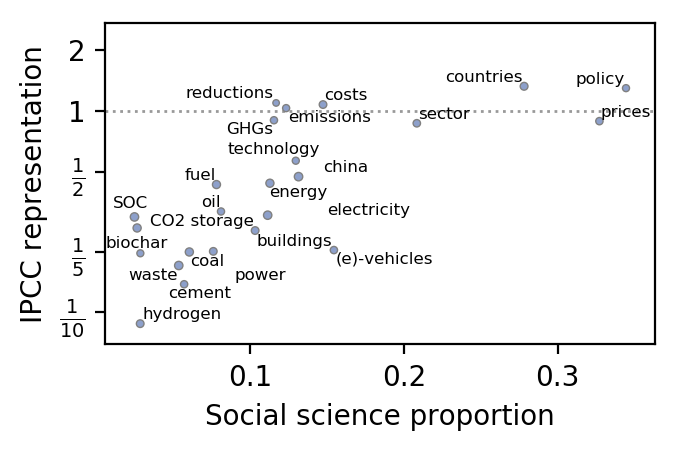

In [27]:
pdf = df[df['primary_wg']==3]

fig, ax = plt.subplots(figsize=(dsize*0.5,dsize*0.3), dpi=200)

def set_log_ticks(fdf, ax, min_y=-8, tight=False):
    fmax = None
    fmin = None
    rmax = fdf['lrep'].max()
    rmax = ax.get_ylim()[1]
    if fmax:
        rmax = fmax
    rmin = fdf['lrep'].min()
    rmin = ax.get_ylim()[0]
    if fmin:
        rmin = -fmin

    if rmin > -1:
        rmin = -1
    if np.exp(rmax) < 2:
        rmax = np.log(2.1)

    lmin = int(1/np.exp(rmin)//1)*-1
    lmax = int(np.exp(rmax)//1)

    all_ytick_labels = [i for i in range(lmin,lmax+1) if i not in [-1,1]]

    ytick_labels = []

    if tight:
        for x in all_ytick_labels:
            if lmin > min_y:
                ytick_labels.append(x)   
            elif abs(x) in [2,10,50]:
                ytick_labels.append(x)
    else:     
        for x in all_ytick_labels:
            if lmin > min_y:
                ytick_labels.append(x)
            else:
                if abs(x) < 11:
                    if x % 5 == 0 or abs(x)==2:
                        ytick_labels.append(x)
                elif x < 100:
                    if x % 50==0 or abs(x)==20:
                        ytick_labels.append(x)


    yticks = []
    ytick_label_fractions = []
    for x in ytick_labels:
        if x < 0:
            y = np.log(-1/x)
            ytick_label_fractions.append('$\\frac{1}{'+str(abs(x))+'}$')
        elif x==0:
            y = 0
            ytick_label_fractions.append(1)
        else:
            y = np.log(x)
            ytick_label_fractions.append(x)
        yticks.append(y)

    ax.set_yticks(yticks)
    ax.set_yticklabels(ytick_label_fractions)   

def wg_socsci_rep(ax, pdf, c, fs=6, s=4, sm=0.01):
    ax.scatter(
        pdf['Social Sciences'], 
        pdf['lrep'],
        c=c,
        linewidths=0.5,
        edgecolors="grey",
        s=s+mdf['score']*sm
    )
    texts = []
    for i, row in pdf.iterrows():
        stext = row['title'].split(',')[0].replace('{','')
        texts.append(ax.text(row['Social Sciences'], row['lrep'], stext, fontsize=fs))

    ax.axhline(0,c="grey",lw=1,alpha=0.8,linestyle=":",zorder=-50)
    ax.set_xlabel("Social science proportion")
    ax.set_ylabel("IPCC representation")
    
    set_log_ticks(pdf, ax)

    adjust_text(texts, ax=ax)


ax.set_ylim(ymin=-2.67)
wg_socsci_rep(ax, pdf, "#8da0cb")

fig.patch.set_facecolor('white') 

#fig.tight_layout()

plt.savefig(
    f'../plots/run_{run_id}_wg3_socsci.{extension}',
    bbox_inches='tight',
    facecolor=fig.get_facecolor(),
    pad_inches=0.2
)
plt.show()

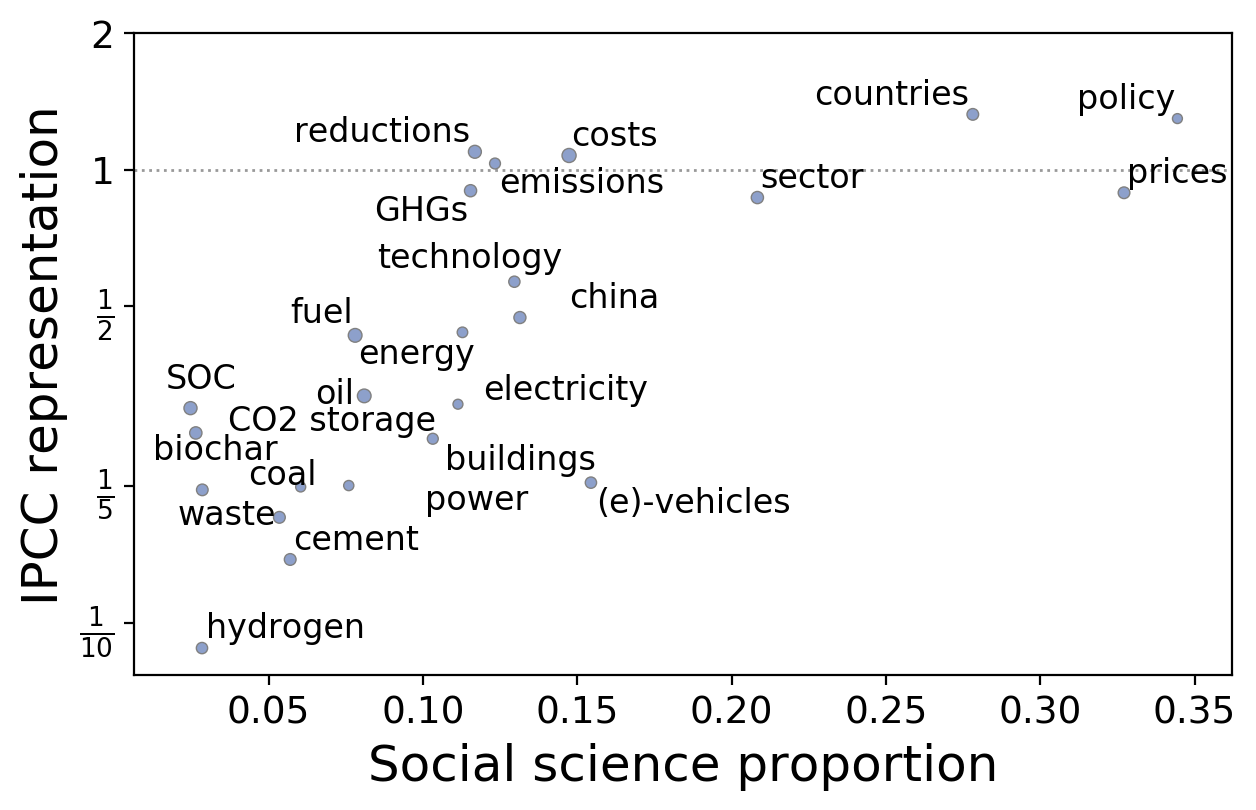

In [10]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 18
TICK_SIZE = 13.5

rc_big = {
    'font.size': SMALL_SIZE,         # controls default text sizes
    'axes.titlesize': SMALL_SIZE,     # fontsize of the axes title
    'axes.labelsize': MEDIUM_SIZE,    # fontsize of the x and y labels
    'xtick.labelsize': TICK_SIZE,    # fontsize of the tick labels
    'ytick.labelsize': TICK_SIZE,   # fontsize of the tick labels
    'legend.fontsize': SMALL_SIZE,    # legend fontsize
    'figure.titlesize': BIGGER_SIZE, # fontsize of the figure title   
}

with plt.rc_context(rc_big):
    
    fig, ax = plt.subplots(figsize=(dsize,dsize*0.6),dpi=200)

    #simplified_oecd_rep(ax, fdf, fs=TICK_SIZE, size=75)
    wg_socsci_rep(ax, pdf, "#8da0cb",fs=12, s=7, sm=0.05)

    fig.patch.set_facecolor('white') 


    plt.savefig(
        f'../plots/run_{run_id}_wg3_socsci_lp.{extension}',
        bbox_inches='tight',
        facecolor=fig.get_facecolor(),
        pad_inches=0.2
    )


    plt.show()

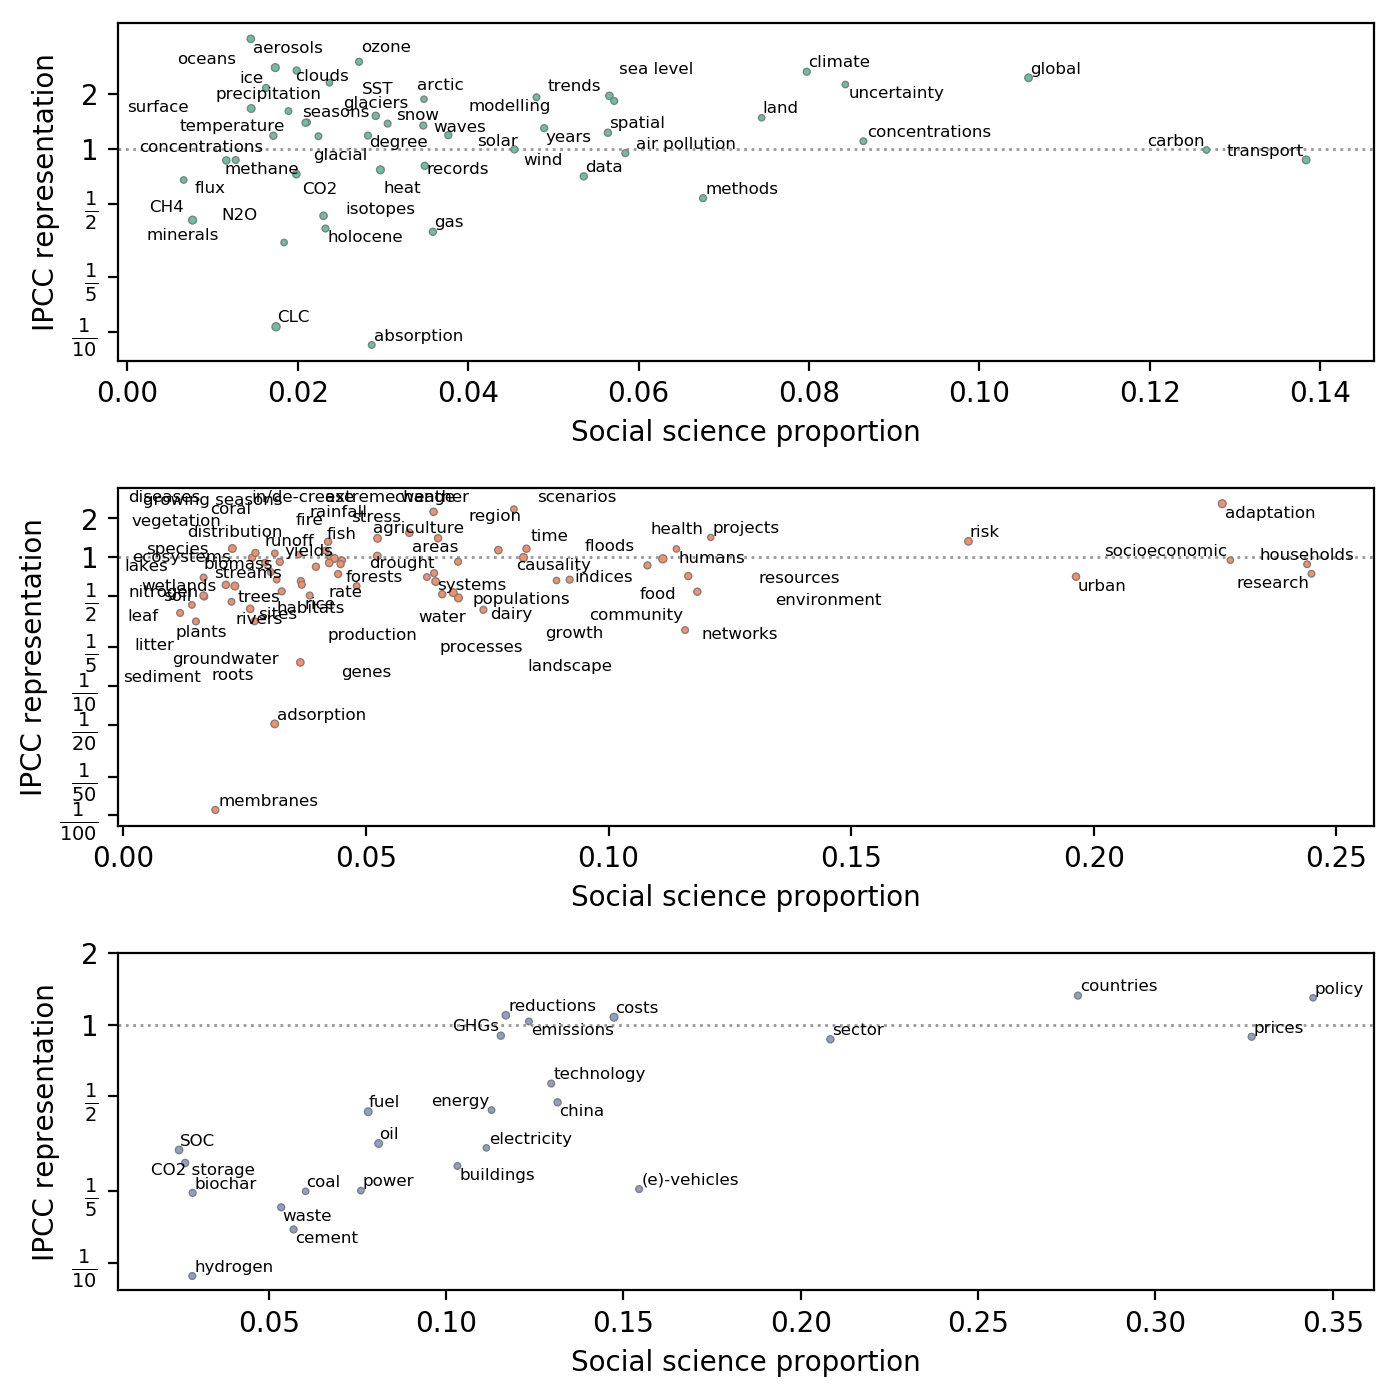

In [11]:
fig, axs = plt.subplots(3,figsize=(dsize,dsize),dpi=200)
colors=["#66c2a5","#fc8d62","#8da0cb"]
for wg in [1,2,3]:
    
    ax = axs[wg-1]

    pdf = df[df['primary_wg']==wg]
    c = colors[wg-1]
    wg_socsci_rep(ax,pdf,c)
    
    set_log_ticks(pdf, ax,-4)
    
    
fig.tight_layout()

plt.savefig(
    f'../plots_pub/wgs_socsci.{extension}',
    bbox_inches='tight',
    facecolor=fig.get_facecolor(),
    pad_inches=0.2
)

plt.show()

/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


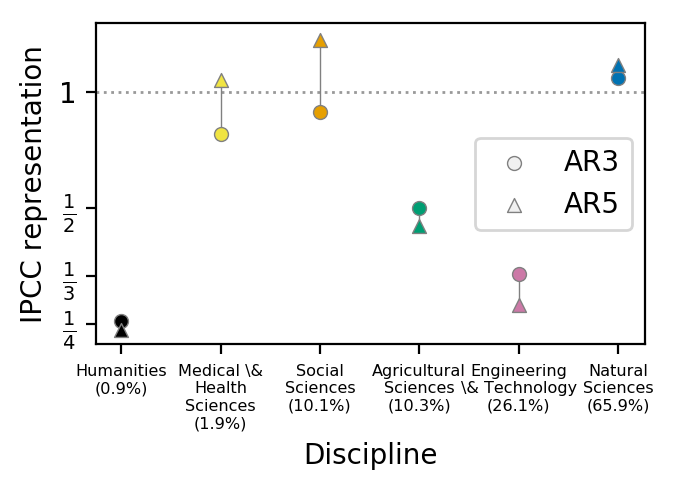

In [12]:
fig, ax = plt.subplots(figsize=(dsize*0.5,dsize*0.3),dpi=200)
import textwrap as tw


oecd_df_ys = pd.read_csv(f'../tables/oecd_representation_{run_id}.csv')
fdf = oecd_df_ys[oecd_df_ys['ar']>2]

fdf['ar_share_total'] = fdf.groupby('ar')['share'].transform('sum')



size = 25

cdict = {
    'Natural Sciences': '#0072B2',
    'Engineering and Technology': '#CC79A7',
    'Agricultural Sciences': '#009E73',
    'Social Sciences': '#E69F00',
    'Medical and Health Sciences': '#F0E442',
    'Humanities': '#000000',
    None: '#F0F0F0'
}

 

def simplified_oecd_rep(ax, fdf, g="wc__oecd", fs = 5.8, ymin=None, w = 13, log_ticks=True, size=25):
    ticks = []
    labels = []
    
    w = 13
    
    fdf = fdf.sort_values('total_share').replace(-np.inf, np.nan).dropna()

    for i, (name, group) in enumerate(fdf.sort_values('total_share').replace(-np.inf, np.nan).dropna().groupby(g, sort=False)):
        group = group.reset_index(drop=True)
        try:
            color = cdict[name]
        except:
            color = cdict[group['oecd'].iloc[0]]
        group = group.replace(-np.inf, np.nan).dropna().sort_values('ar').reset_index(drop=True)
        if group.shape[0]==0:
            continue
        name = f"{name} ({group['total_share'].iloc[0]:.1%})"
        name = name.replace(' and ',' \& ')
        name = tw.fill(tw.dedent(name),width=w)
        ticks.append(i)
        labels.append(name)
        #color = group.reset_index()['color'][0]
        
        group['s_share'] = group['share'] / group['ar_share_total']

        start = group['lrep'][0]
        end = group['lrep'][len(group)-1]
        ax.plot(
            [i,i],
            [start,end],
            color="grey",
            zorder=-50,
            lw=0.5
        )
        ax.scatter(
            i,
            start,
            label=None,
            color=color,
            s = size,
            edgecolor="grey",
            lw=0.5
            #marker="x"
        )
        ax.scatter(
            i,
            end,
            label=None,
            color=color,
            s = size,
            edgecolor="grey",
            marker="^",
            lw=0.5
        )


    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, ha="center", va="top", rotation=0, fontsize=fs)
    #ax.set_xticklabels(labels, ha="right", va="top", rotation=25)
    ax.axhline(0,c="grey",lw=1,alpha=0.8,linestyle=":",zorder=-50)
    
    if log_ticks:
        set_log_ticks(fdf, ax)

    for l in [("AR3","o"),("AR5","^")]:
        ax.scatter(
            [],[],
            c='#f0f0f0',s=size,
            edgecolor="grey",
            label=l[0],marker=l[1],
            lw=0.5
        )

    ax.legend()
    
    ax.set_xlabel("Discipline")
    ax.set_ylabel("IPCC representation")
        
simplified_oecd_rep(ax, fdf)

fig.patch.set_facecolor('white') 


plt.savefig(
    '../plots/ipcc_representation/ipcc_rep_oecds_simplified.{}'.format(extension),
    bbox_inches='tight',
    facecolor=fig.get_facecolor(),
    pad_inches=0.2
)


plt.show()

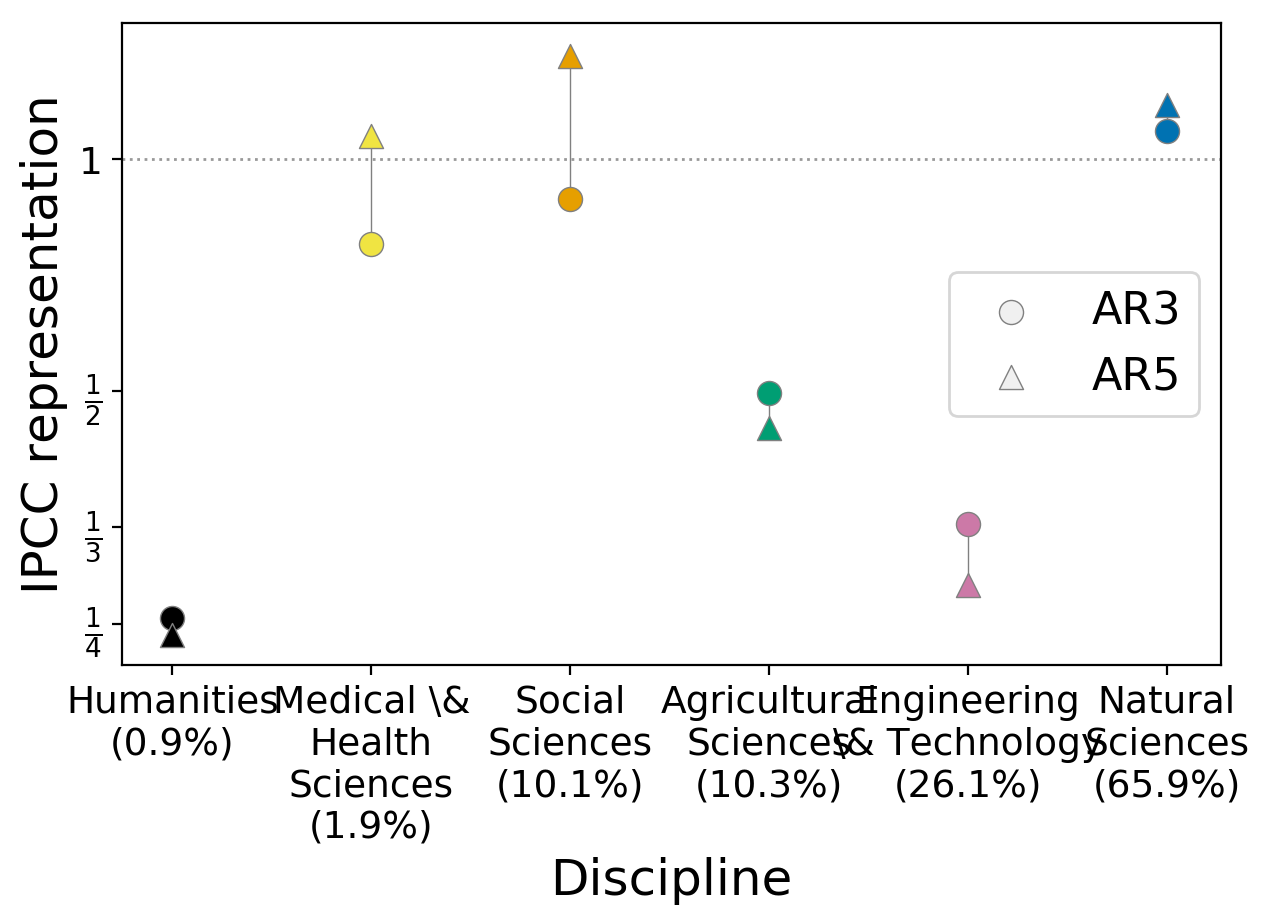

In [13]:


SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 18
TICK_SIZE = 13.5

rc_big = {
    'font.size': SMALL_SIZE,         # controls default text sizes
    'axes.titlesize': SMALL_SIZE,     # fontsize of the axes title
    'axes.labelsize': MEDIUM_SIZE,    # fontsize of the x and y labels
    'xtick.labelsize': TICK_SIZE,    # fontsize of the tick labels
    'ytick.labelsize': TICK_SIZE,   # fontsize of the tick labels
    'legend.fontsize': SMALL_SIZE,    # legend fontsize
    'figure.titlesize': BIGGER_SIZE, # fontsize of the figure title   
}

with plt.rc_context(rc_big):
    fig, ax = plt.subplots(figsize=(dsize,dsize*0.6),dpi=200)
    simplified_oecd_rep(ax, fdf, fs=TICK_SIZE, size=75)


    fig.patch.set_facecolor('white') 


    plt.savefig(
        '../plots/ipcc_representation/ipcc_rep_oecds_simplified_lp.{}'.format(extension),
        bbox_inches='tight',
        facecolor=fig.get_facecolor(),
        pad_inches=0.2
    )


    plt.show()

In [14]:
oecd_df_ys['elrep'] = np.exp(abs(oecd_df_ys['lrep']))
oecd_df_ys[oecd_df_ys['ar']==5]

,ar,color,ipcc_share,share,total_share,wc__oecd,representation,lrep,ar_share_total,elrep
28,5,#7fc97f,0.047311,0.105460,0.102866,Agricultural Sciences,0.448619,-0.801582,1.167779,2.229065
29,5,#beaed4,0.077432,0.276170,0.260545,Engineering and Technology,0.280377,-1.271619,1.167779,3.566624
30,5,#fdc086,0.002130,0.008823,0.009045,Humanities,0.241467,-1.421021,1.167779,4.141346
31,5,#ffff99,0.023876,0.022348,0.018990,Medical and Health Sciences,1.068387,0.066150,1.167779,1.068387
32,5,#386cb0,0.763371,0.651200,0.658729,Natural Sciences,1.172251,0.158926,1.167779,1.172251
33,5,#f0027f,0.140244,0.103310,0.101383,Social Sciences,1.357509,0.305651,1.167779,1.357509
34,5,#F0F0F0,0.000073,0.000469,0.001772,NaN,0.156749,-1.853110,1.167779,6.379628


/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


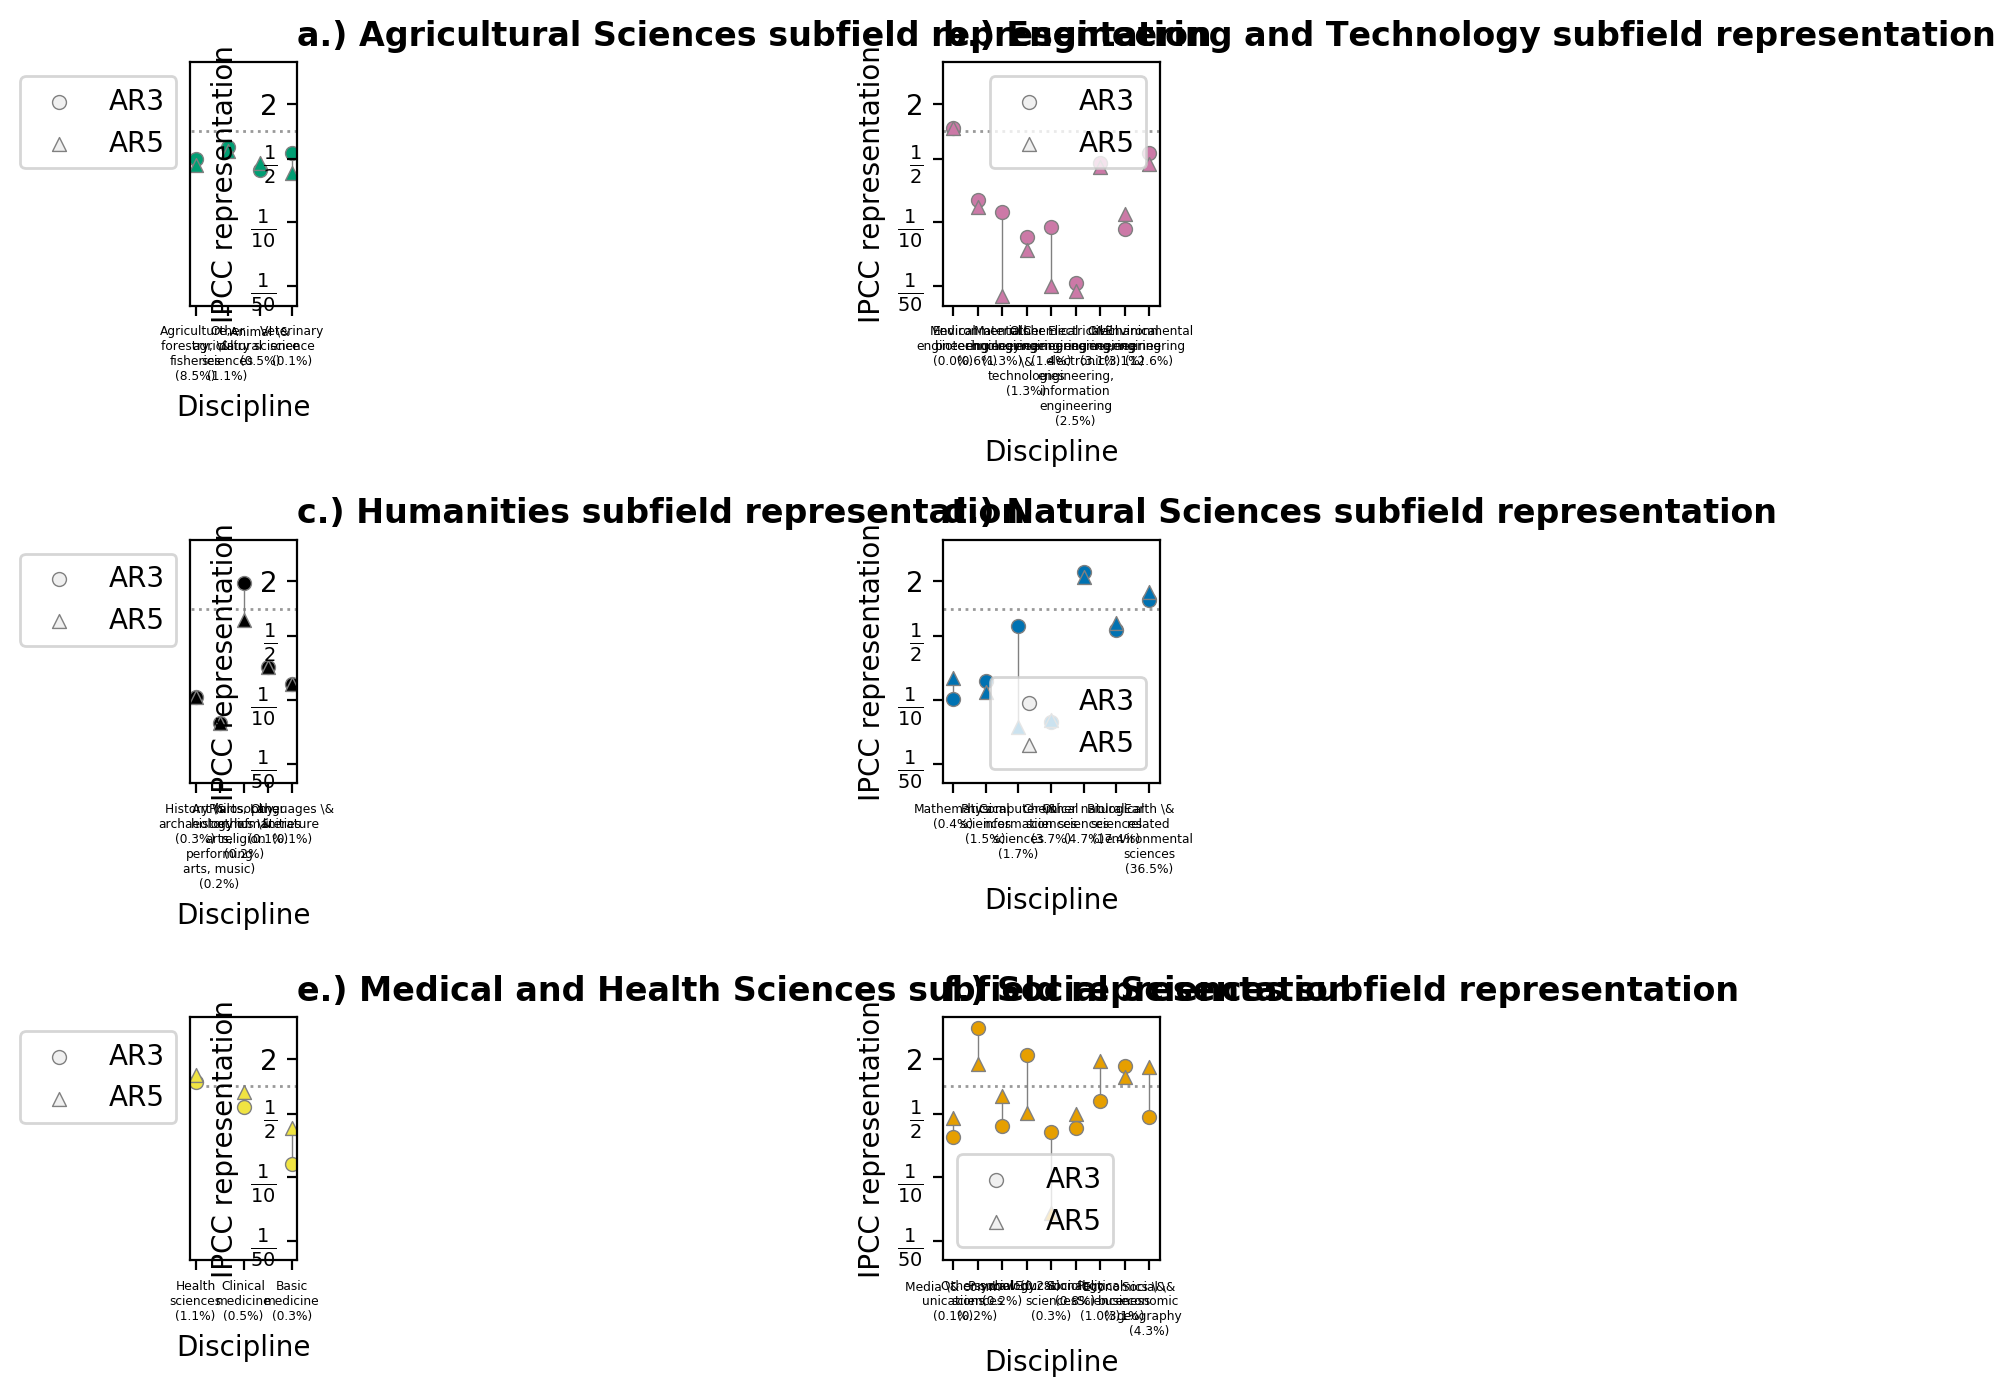

In [15]:
from string import ascii_lowercase
wc_df_ys = pd.read_csv(f'../tables/wc_representation_{run_id}.csv')
wc_df_ys.head()

fdf = wc_df_ys[wc_df_ys['ar']>2]

#fdf = fdf[fdf['oecd']=="Agricultural Sciences"]

fdf['ar_share_total'] = fdf.groupby('ar')['share'].transform('sum')

#fig, axs = plt.subplots(3,2,figsize=(dsize,dsize),dpi=200)

fig = plt.figure(figsize=(dsize,dsize),dpi=200)

lax = None

y1 = 0
y2 = 0

gsize = (3,5)

axs = [
    [
        plt.subplot2grid(gsize, (0, 0), colspan=2, rowspan=1),
        plt.subplot2grid(gsize, (1, 0), colspan=2, rowspan=1),
        plt.subplot2grid(gsize, (2, 0), colspan=2, rowspan=1)
    ],
    [
        plt.subplot2grid(gsize, (0, 2), colspan=3, rowspan=1),
        plt.subplot2grid(gsize, (1, 2), colspan=3, rowspan=1),
        plt.subplot2grid(gsize, (2, 2), colspan=3, rowspan=1)
    ],
]

ids = [
    ['a','c','e'],
    ['b','d','f']
]

for i, (name, fdf) in enumerate(fdf.groupby('oecd')):
            
    if len(fdf['oecd_fos_text'].unique()) < 6:
        col = 0
        y = y1
        y1+=1
    else:
        col = 1
        y = y2
        y2+=1
        
    ax = axs[col][y]

    simplified_oecd_rep(ax, fdf, "oecd_fos_text", 4.4, log_ticks=True)
    ax.set_title(f"{ids[col][y]}.) {name} subfield representation", loc="left", fontweight="bold")
    set_log_ticks(fdf.sort_values('total_share').replace(-np.inf, np.nan).dropna(), ax, 5, True)

  
axs = axs[0] + axs[1]
ymin = min(a.get_ylim()[0] for a in axs)
ymax = max(a.get_ylim()[1] for a in axs)

ylab = 0

for a in axs:
    if a.get_yticks()[0] < ylab:
        ylab = a.get_yticks()[0]
        yticks = a.get_yticks()
        yticklabels = a.get_yticklabels()
    a.set_ylim((ymin,ymax))
        
for a in axs:
    a.set_yticks(yticks)
    a.set_yticklabels(yticklabels)
    
    
fig.tight_layout()
fig.patch.set_facecolor('white') 

plt.savefig(
    '../plots_pub/ipcc_rep_wcs_simplified.{}'.format(extension),
    bbox_inches='tight',
    facecolor=fig.get_facecolor(),
    pad_inches=0.2
)

plt.show()



/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


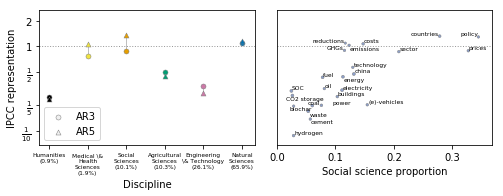

In [28]:
fdf = oecd_df_ys[oecd_df_ys['ar']>2]

fdf['ar_share_total'] = fdf.groupby('ar')['share'].transform('sum')
#fig, axs = plt.subplots(2,1,figsize=(dsize*0.5,dsize*0.7), dpi=200)
#fig, axs = plt.subplots(1,2,figsize=(dsize*0.5,dsize*0.7))
fig, axs = plt.subplots(1,2,figsize=(dsize,dsize*0.4))#,sharey=True)

for a in axs:
    a.set_ylim(ymin=-2.7)

simplified_oecd_rep(axs[0], fdf)

wg_socsci_rep(axs[1], pdf, "#8da0cb")

axs[1].set_ylabel("")
axs[1].set_yticks([])

ymin = min(a.get_ylim()[0] for a in axs)
ymax = max(a.get_ylim()[1] for a in axs)

for a in axs:
    a.set_ylim((ymin,ymax))

#axs[0].set_ylim(axs[1].get_ylim())

fig.patch.set_facecolor('white') 
fig.tight_layout()

plt.savefig(
    '../plots_pub/panel_representation.{}'.format(extension),
    bbox_inches='tight',
    facecolor=fig.get_facecolor(),
    pad_inches=0.2
)

plt.show()

6.502585929912699
(-5.137688766431347, 2.0151557564726215)


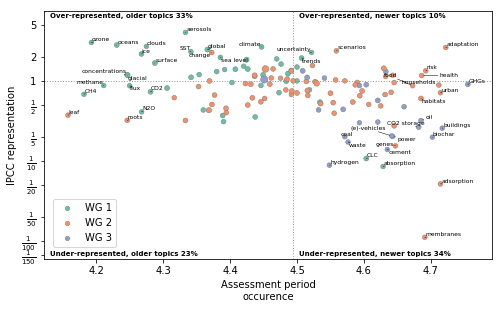

In [34]:
run_id = 1861
mdf = pd.read_csv(f'../tables/newness_representation_{run_id}.csv')

def rep_time(ax, mdf, lquads=False, log_ticks=False, fs=7, quantiles=10, size=20):
    x = 'year_av'
    y = 'representation'
    y = 'lrep'

    mdf['lrep'] = np.log(mdf['representation'])

    cmap = {1: "#66c2a5", 2: "#fc8d62" , 3: "#8da0cb"}
    colors = [cmap[i] for i in mdf['primary_wg']]


    mdf.plot.scatter(
        x,y,s=20+mdf['score']*0.015,
        c = colors,ax=ax,
        lw=0.5,
        edgecolor="grey"
    )
    
    for k,v in cmap.items():
        ax.scatter(
            [],[],
            c=v,s=size,
            edgecolor="grey",
            lw=0.5,
            label=f"WG {k}",
        )   
        
    


    # Fit a trendline
    #z = np.polyfit(x=mdf[x], y=mdf[y], deg=1)
    #p = np.poly1d(z)
    #mdf['trendline'] = p(mdf.loc[:, x])
    #plt.plot(mdf[x],mdf['trendline'])


    # Quantile x and y
    qs = quantiles
    mdf['x_q'] = pd.qcut(mdf[x], qs, labels=False)
    mdf['y_q'] = pd.qcut(mdf[y], qs, labels=False)
    texts = []
    
    lfs = fs - 1
    if lfs < 5:
        lfs=5

    # write texts for dots in outer quantiles
    for i, row in mdf[(mdf['x_q'].isin([0,qs-1])) | (mdf['y_q'].isin([0,qs-1]))].iterrows(): 
        t = row['title'].split(',')[0].strip('{} ')
        texts.append(
            ax.text(row[x],row[y],t,ha='center', va='center',fontsize=lfs)
        )


    # Split the graph into quadrants
    ymid = 0
    ax.axhline(ymid,c="grey",lw=1,alpha=0.8,linestyle=":",zorder=-50)
    ax.axvline(mdf[x].median(),c="grey",lw=1,alpha=0.8,linestyle=":",zorder=-50)



    # Put labels on the quadrants
    # x
    d1 = mdf[x].median()-plt.xlim()[0]
    d2 = mdf[x].median()-plt.xlim()[1]

    xlabpoints = [mdf[x].median()-d1/2,mdf[x].median()-d2/2]
    
    xrange = mdf[x].max()-mdf[x].min()
    xlabpoints = [mdf[x].min()+xrange*0.15,mdf[x].min()+xrange*0.85]
    
    pad = (mdf[x].min() - ax.get_xlim()[0])*0.25
    
    xlabpoints = [ax.get_xlim()[0] + pad, mdf[x].median() + pad]
    
    yrange = ax.get_ylim()[1] - ax.get_ylim()[0]
    
    print(yrange)
    
    ax.set_ylim(top=ax.get_ylim()[1]+yrange*0.05,bottom=ax.get_ylim()[0]-yrange*0.05)
    
    print(ax.get_ylim())
    

    
    if lquads:
        labels = [
            ['Under-represented,\nolder topics','Under-represented,\nnewer topics'],
            ['Over-represented,\nolder topics','Over-represented,\nnewer topics']
        ]

        pylims = ax.get_ylim()

        tpad = (pylims[1]-pylims[0])*0.2
        
        tpad=-pad*18

        ops = [operator.lt,operator.gt]

        for i in [0,1]:
            for j in [0,1]:
                if j==0:
                    tpadx=tpad*-1
                else:
                    tpadx=tpad*1


                q = mdf[(ops[i](mdf[x],mdf[x].median())) & (ops[j](mdf[y],ymid))]
                qshare = q['score'].sum()/mdf['score'].sum()
                l = labels[j][i].replace("\n"," ")
                ax.text(
                    xlabpoints[i],
                    pylims[j]+tpadx,
                    f"{l} {qshare:.0%}",
                    va="center",ha="left",
                    fontweight='bold',
                    #bbox={'facecolor':'red', 'alpha':qshare*2-0.1, 'pad':6},
                    fontsize=fs
                )

    if log_ticks:
        set_log_ticks(mdf, ax)

    #ax.get_yaxis().set_visible(False)
    #ax.tick_params(axis=u'both', which=u'both',length=0)
    #ax2.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_xlabel('Assessment period\noccurence')
    ax.set_ylabel('IPCC representation')
    ax.legend(loc=(0.02,0.05))
    
    # Tweak the labels to avoid overlap    
    adjust_text(
        texts, 
        arrowprops=dict(arrowstyle="-", color='black', lw=0.5)
    )

fig, ax = plt.subplots(figsize=(dsize,dsize*0.62))

rep_time(ax, mdf, lquads=True, log_ticks=True)

plt.tight_layout(h_pad=100)

fig.patch.set_facecolor('white')    


plt.savefig(
    '../plots_pub/rep_time.{}'.format(extension),
    bbox_inches='tight',
    facecolor=fig.get_facecolor(),
    pad_inches=0.2
)

plt.show()

6.15
(-4.8575, 1.9075000000000002)


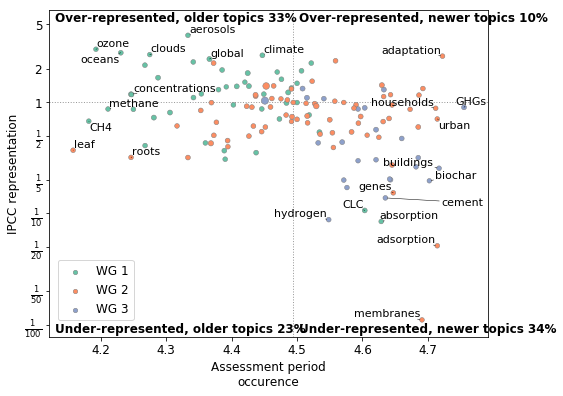

In [35]:
SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 12
TICK_SIZE = 12

rc_big = {
    'font.size': SMALL_SIZE,         # controls default text sizes
    'axes.titlesize': SMALL_SIZE,     # fontsize of the axes title
    'axes.labelsize': MEDIUM_SIZE,    # fontsize of the x and y labels
    'xtick.labelsize': TICK_SIZE,    # fontsize of the tick labels
    'ytick.labelsize': TICK_SIZE,   # fontsize of the tick labels
    'legend.fontsize': SMALL_SIZE,    # legend fontsize
    'figure.titlesize': BIGGER_SIZE, # fontsize of the figure title   
}

with plt.rc_context(rc_big):

    fig, ax = plt.subplots(figsize=(dsize,dsize*0.8))
    fig.patch.set_facecolor('white')    
    ax.set_ylim(ymin=-4.55, ymax=1.6)
    rep_time(ax, mdf, lquads=True, log_ticks=True, fs=12, quantiles=20)

    plt.tight_layout(h_pad=100)

    plt.savefig(
        '../plots_pub/rep_time_lp.{}'.format(extension),
        bbox_inches='tight',
        facecolor=fig.get_facecolor(),
        pad_inches=0.2
    )

    plt.show()

6.1
(-4.805, 1.905)


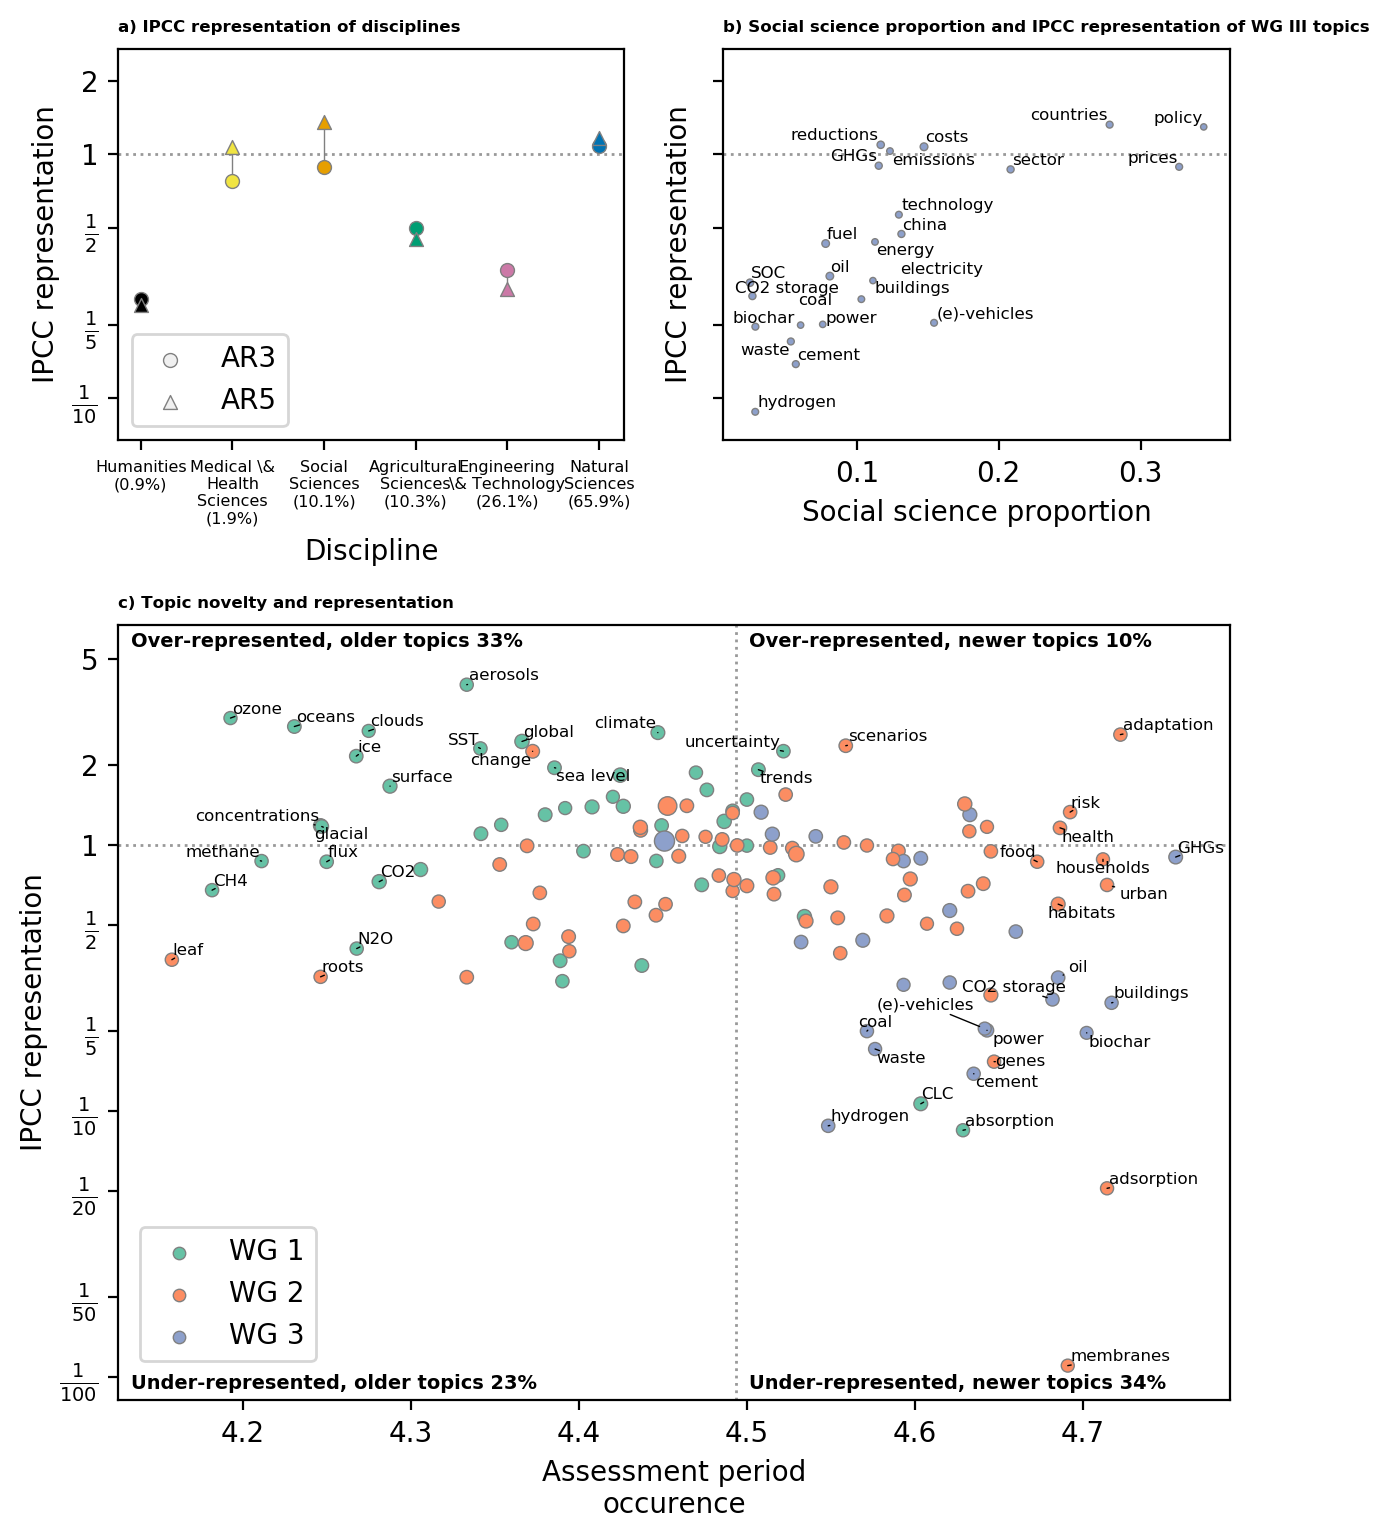

In [36]:
fig = plt.figure(figsize=(dsize, dsize*1.1), dpi=200)


gsize = (8,2)

ax1 = plt.subplot2grid(gsize, (0, 0), colspan=1, rowspan=3)

ax2 = plt.subplot2grid(gsize, (0, 1), colspan=1, rowspan=3)

ax2.set_ylabel("")
ax2.set_yticks([])

axs = [ax1,ax2]

for a in axs:
    a.set_ylim(ymin=-2.7)

simplified_oecd_rep(ax1, fdf)
wg_socsci_rep(ax2, pdf, "#8da0cb")

ymin = min(a.get_ylim()[0] for a in axs)
ymax = max(a.get_ylim()[1] for a in axs)

ax2.set_yticklabels([])

for a in axs:
    a.set_ylim((ymin,ymax))

ax3 = plt.subplot2grid(gsize, (3, 0), colspan=2, rowspan=5)

ax3.set_ylim(ymin=-4.5, ymax=1.6)

if extension=="png":
    panel_fs = 6
else:
    panel_fs = 7

ax1.set_title(
    "a) IPCC representation of disciplines", 
    fontsize=panel_fs, fontweight="bold",loc="left"
)

ax2.set_title(
    "b) Social science proportion and IPCC representation of WG III topics", 
    fontsize=panel_fs, fontweight="bold",loc="left"
)

ax3.set_title(
    "c) Topic novelty and representation", 
    fontsize=panel_fs, fontweight="bold",loc="left"
)

rep_time(ax3, mdf, lquads=True, log_ticks=True)

fig.canvas.draw()

fig.tight_layout()

fig.patch.set_facecolor('white')    

plt.savefig(
    '../plots_pub/big_panel_representation.{}'.format(extension),
    bbox_inches='tight',
    facecolor=fig.get_facecolor(),
    pad_inches=0.2
)

plt.show()

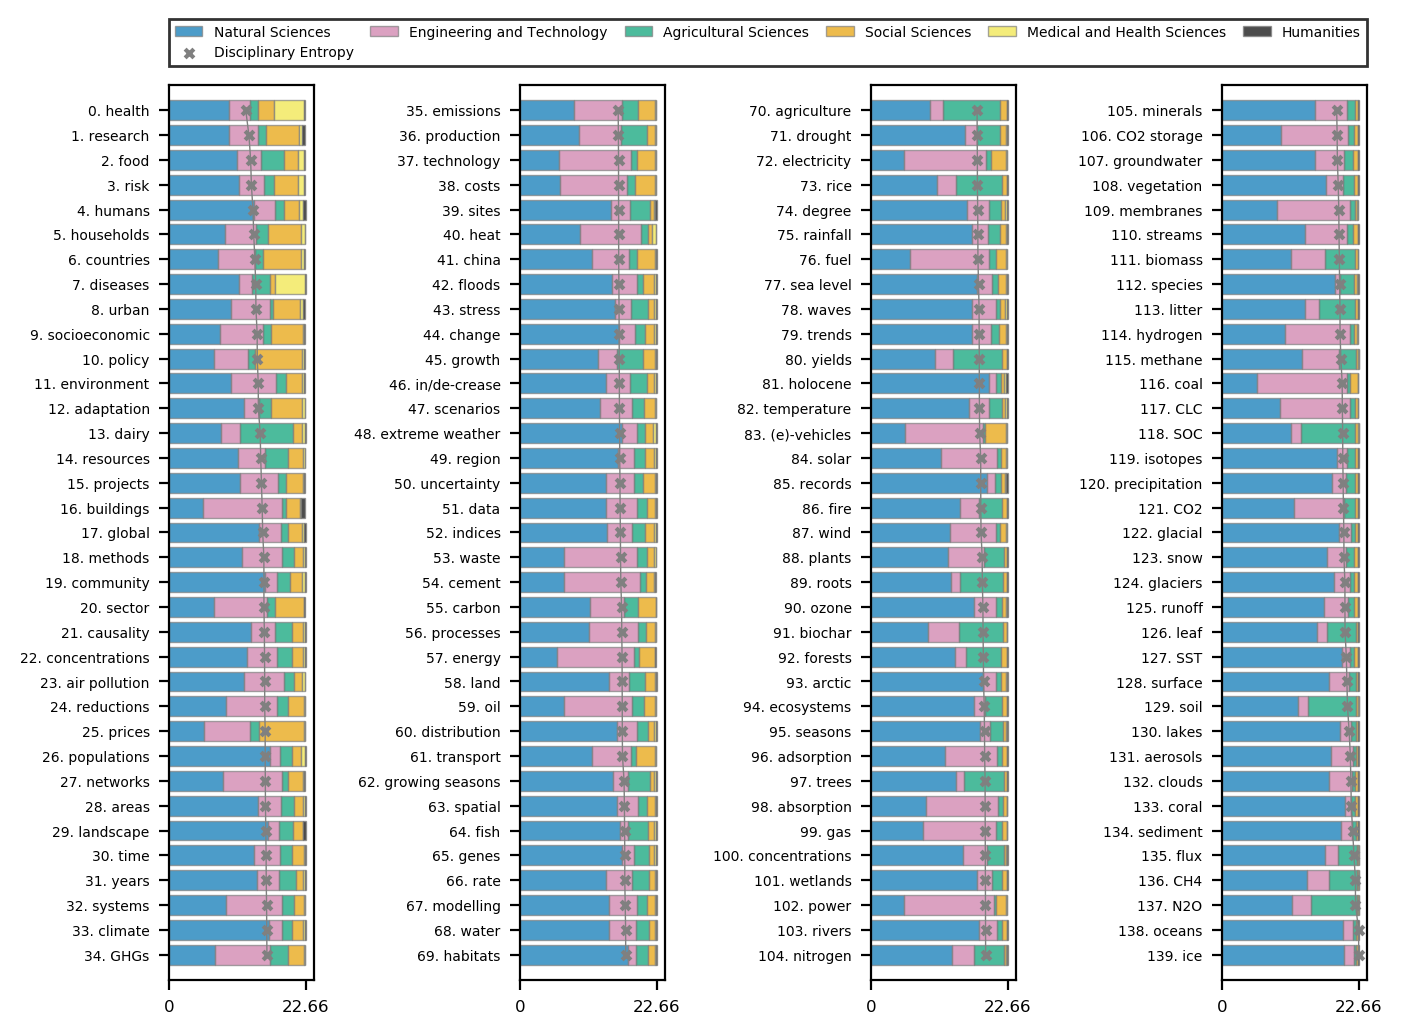

In [20]:
import math


tdf = pd.read_csv(f'../tables/topic_info_{run_id}.csv')

tdf = pd.merge(df, tdf)

tdf = df

tdf['H'] = 0
for k,v in cdict.items():
    if k is None:
        continue
    tdf['H'] += tdf[k]+np.log(tdf[k])

tdf['H'] = -tdf['H']

n = 4

y = "H"

tdf = tdf.sort_values(y).reset_index(drop=True)
tdf = tdf.reset_index()

fig, axs = plt.subplots(
    1,n,
    figsize=(dsize,dsize*0.7),dpi=200,
    sharex=True
)

pdfs = []
chunks = math.ceil(tdf.shape[0]/n)
    
for i in range(n):
    f = i*chunks
    l = (i+1)*chunks
    pdfs.append(tdf[f:l].sort_values(y,ascending=False).reset_index(drop=True))

for pdf, ax in zip(pdfs,axs):
    b = 0
    for k,v in cdict.items():
        if k is None:
            continue
        s = pdf[k]
        
        ax.barh(
            pdf.index,
            s,
            #color = [colors[x-1] for x in pdf['primary_wg']],
            color=v,
            left=b,
            edgecolor='grey',
            linewidth=0.5,
            alpha=0.7,
            zorder=-10,
            label=k
        )
        
        b+=s
        
    ax.scatter(
        pdf[y]/tdf[y].max(),
        pdf.index,
        marker="x",
        s=10,
        c="grey",
        label="Disciplinary Entropy"
    )
    ax.plot(
        pdf[y]/tdf[y].max(),
        pdf.index,
        lw=0.5,
        c="grey"
    )

    ax.set_yticks(pdf.index)
    ax.set_yticklabels([f"{x['index']}. {x['title'].split(',')[0].replace(' ',' ')}" for i, x in pdf.iterrows()],fontsize=5)
    
    ax.set_xticks([0,1])
    
    ax.set_xticklabels([0,round(tdf[y].max(),2)],fontsize=6)

    ax.set_ylim(-1,math.ceil(tdf.shape[0]/n))
    
fig.tight_layout()

fig.patch.set_facecolor('white')    

#axs[0].legend(bbox_to_anchor=(0., 1.02, n+n-1, .102), loc=3,
       #ncol=2, mode="expand", borderaxespad=0.,fontsize=5)

s = fig.subplotpars
bb=[s.left, s.top+0.02, s.right-s.left, 0.05 ]

handles, labels = ax.get_legend_handles_labels()

handles = handles[1:2] + handles[:1] + handles[2:]
labels = labels[1:2] + labels[:1] + labels[2:]

leg = axs[0].legend(
    handles, labels,
    loc=8,bbox_to_anchor=bb, ncol= 6, mode="expand", borderaxespad=0,
    bbox_transform=fig.transFigure, fancybox=False, edgecolor="k",fontsize=5
)





plt.savefig(
    '../plots_pub/topic_oecd_entropy.{}'.format(extension),
    bbox_inches='tight',
    facecolor=fig.get_facecolor(),
    pad_inches=0.2
)

plt.show()

In [21]:
tdf.head()

,index,ipcc_coverage,ipcc_score,ipcc_share,primary_wg,score,share,title,deviation,abs_md,...,lrep,x_q,y_q,Agricultural Sciences,Engineering and Technology,Humanities,Medical and Health Sciences,Natural Sciences,Social Sciences,H
0,0,0.214851,19.324856,0.006448,2,205.288835,0.005572,"health, public health impacts",0.000876,0.000876,...,0.145969,9,7,0.063461,0.154936,0.010308,0.219381,0.435788,0.114000,12.718165
1,1,0.139253,19.841826,0.006621,2,328.077036,0.008905,"research, research agenda & sustainability sci...",-0.002285,0.002285,...,-0.296462,7,4,0.059428,0.212919,0.024153,0.020173,0.435313,0.244880,13.238373
2,2,0.165851,11.749216,0.003920,2,167.337119,0.004542,"food, food",-0.000622,0.000622,...,-0.147230,9,4,0.164710,0.173930,0.007289,0.043704,0.499010,0.108035,13.528144
3,3,0.250173,20.850810,0.006957,2,193.292901,0.005247,"risk, risk management, risk perception and cli...",0.001711,0.001711,...,0.282180,9,7,0.069191,0.184553,0.007645,0.050037,0.512424,0.174184,13.647592
4,4,0.151743,18.291226,0.006103,2,231.589446,0.006286,"humans, human activity, human behaviour & impa...",-0.000183,0.000183,...,-0.029550,5,5,0.065904,0.155102,0.017031,0.027815,0.621609,0.111205,13.911284


In [23]:
tdf[
    (tdf['Natural Sciences'] > tdf['Social Sciences']) & 
    (tdf['Natural Sciences'] > tdf['Agricultural Sciences']) & 
    (tdf['Natural Sciences'] > tdf['Engineering and Technology']) &
    (tdf['Natural Sciences'] > tdf['Humanities']) &
    (tdf['Natural Sciences'] > tdf['Medical and Health Sciences']) 
].shape

(115, 23)

80
90
100
110
120
130


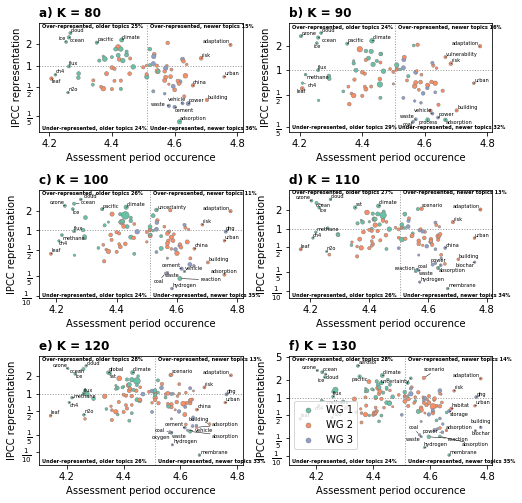

In [24]:
from string import ascii_lowercase

def rep_time(ax, mdf, lquads=False, log_ticks=False, fs=7, quantiles=10):
    x = 'year_av'
    y = 'representation'
    y = 'lrep'
    
    mdf['lrep'] = np.log(mdf['representation'])

    cmap = {1: "#66c2a5", 2: "#fc8d62" , 3: "#8da0cb"}
    colors = [cmap[i] for i in mdf['primary_wg']]


    mdf.plot.scatter(
        x,y,s=mdf['score']*0.03,
        c = colors,ax=ax,
        lw=0.5,
        edgecolor="grey"
    )
    
    for k,v in cmap.items():
        ax.scatter(
            [],[],
            c=v,s=size,
            edgecolor="grey",
            lw=0.5,
            label=f"WG {k}",
        )   
        
    


    # Fit a trendline
    #z = np.polyfit(x=mdf[x], y=mdf[y], deg=1)
    #p = np.poly1d(z)
    #mdf['trendline'] = p(mdf.loc[:, x])
    #plt.plot(mdf[x],mdf['trendline'])


    # Quantile x and y
    qs = quantiles
    mdf['x_q'] = pd.qcut(mdf[x], qs, labels=False)
    mdf['y_q'] = pd.qcut(mdf[y], qs, labels=False)
    texts = []
    
    lfs = fs - 1
    if lfs < 5:
        lfs=5

    # write texts for dots in outer quantiles
    for i, row in mdf[(mdf['x_q'].isin([0,qs-1])) | (mdf['y_q'].isin([0,qs-1]))].iterrows(): 
        t = row['title'].split(',')[0].strip('{} ')
        texts.append(
            ax.text(row[x],row[y],t,ha='center', va='center',fontsize=lfs)
        )


    # Split the graph into quadrants
    ymid = 0
    ax.axhline(ymid,c="grey",lw=1,alpha=0.8,linestyle=":",zorder=-50)
    ax.axvline(mdf[x].median(),c="grey",lw=1,alpha=0.8,linestyle=":",zorder=-50)



    # Put labels on the quadrants
    # x
    d1 = mdf[x].median()-plt.xlim()[0]
    d2 = mdf[x].median()-plt.xlim()[1]

    xlabpoints = [mdf[x].median()-d1/2,mdf[x].median()-d2/2]
    
    xrange = mdf[x].max()-mdf[x].min()
    xlabpoints = [mdf[x].min()+xrange*0.15,mdf[x].min()+xrange*0.85]
    
    pad = (mdf[x].min() - ax.get_xlim()[0])*0.25
    
    xlabpoints = [ax.get_xlim()[0] + pad, mdf[x].median() + pad]
    

    
    if lquads:
        labels = [
            ['Under-represented,\nolder topics','Under-represented,\nnewer topics'],
            ['Over-represented,\nolder topics','Over-represented,\nnewer topics']
        ]

        pylims = ax.get_ylim()

        yr = pylims[1]-pylims[0]
        
        ax.set_ylim(pylims[0]-yr*0.05,pylims[1]+yr*0.05)
        
        pylims = ax.get_ylim()
        
        tpad = (pylims[1]-pylims[0])*0.13
        
        tpad=-pad*12

        ops = [operator.lt,operator.gt]

        for i in [0,1]:
            for j in [0,1]:
                if j==0:
                    tpadx=tpad*-1
                else:
                    tpadx=tpad*1


                q = mdf[(ops[i](mdf[x],mdf[x].median())) & (ops[j](mdf[y],ymid))]
                qshare = q['score'].sum()/mdf['score'].sum()
                l = labels[j][i].replace("\n"," ")
                ax.text(
                    xlabpoints[i],
                    pylims[j]+tpadx,
                    f"{l} {qshare:.0%}",
                    va="center",ha="left",
                    fontweight='bold',
                    #bbox={'facecolor':'red', 'alpha':qshare*2-0.1, 'pad':6},
                    fontsize=fs
                )

    if log_ticks:
        set_log_ticks(mdf, ax, -4)

    #ax.get_yaxis().set_visible(False)
    #ax.tick_params(axis=u'both', which=u'both',length=0)
    #ax2.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_xlabel('Assessment period occurence')
    ax.set_ylabel('IPCC representation')
    
    # Tweak the labels to avoid overlap    
    adjust_text(
        texts, 
        arrowprops=dict(arrowstyle="-", color='black', lw=0.5)
    )


### Proportionality for other values of K
fig = plt.figure(figsize=(dsize,dsize*1))

size = 25
for i, run_id in enumerate([1794, 1795, 1800, 1804, 1810, 1811]):
    mdf = pd.read_csv(f'../tables/newness_representation_{run_id}.csv')

    print(mdf.shape[0])
    
    ax = fig.add_subplot(3,2,i+1)
    #ax.margins(0.1,0.1)

    rep_time(ax, mdf, lquads=True, log_ticks=True, fs=5, quantiles=16)
    
    ax.set_title(f"{ascii_lowercase[i]}) K = {mdf.shape[0]}",loc="left", fontweight="bold")
    
    #print(ax.margins())

ax.legend(bbox_to_anchor=(0,0.1), loc="lower left")
fig.tight_layout()

fig.patch.set_facecolor('white')   

plt.savefig(
    '../plots_pub/topic_rep_ks.{}'.format(extension),
    bbox_inches='tight',
    facecolor=fig.get_facecolor(),
    pad_inches=0.2
)

plt.show()

In [17]:
from string import ascii_lowercase

def rep_time(ax, mdf, lquads=False, log_ticks=False, fs=7, quantiles=10):
    x = 'year_av'
    y = 'representation'
    y = 'lrep'
    
    mdf['lrep'] = np.log(mdf['representation'])

    cmap = {1: "#66c2a5", 2: "#fc8d62" , 3: "#8da0cb"}
    colors = [cmap[i] for i in mdf['primary_wg']]


    mdf.plot.scatter(
        x,y,s=mdf['score']*0.03,
        c = colors,ax=ax,
        lw=0.5,
        edgecolor="grey"
    )
    
    for k,v in cmap.items():
        ax.scatter(
            [],[],
            c=v,s=size,
            edgecolor="grey",
            lw=0.5,
            label=f"WG {k}",
        )   
        
    


    # Fit a trendline
    #z = np.polyfit(x=mdf[x], y=mdf[y], deg=1)
    #p = np.poly1d(z)
    #mdf['trendline'] = p(mdf.loc[:, x])
    #plt.plot(mdf[x],mdf['trendline'])


    # Quantile x and y
    qs = quantiles
    mdf['x_q'] = pd.qcut(mdf[x], qs, labels=False)
    mdf['y_q'] = pd.qcut(mdf[y], qs, labels=False)
    texts = []
    
    lfs = fs - 1
    if lfs < 5:
        lfs=5

    # write texts for dots in outer quantiles
    for i, row in mdf[(mdf['x_q'].isin([0,qs-1])) | (mdf['y_q'].isin([0,qs-1]))].iterrows(): 
        t = row['title'].split(',')[0].strip('{} ')
        texts.append(
            ax.text(row[x],row[y],t,ha='center', va='center',fontsize=lfs)
        )


    # Split the graph into quadrants
    ymid = 0
    ax.axhline(ymid,c="grey",lw=1,alpha=0.8,linestyle=":",zorder=-50)
    ax.axvline(mdf[x].median(),c="grey",lw=1,alpha=0.8,linestyle=":",zorder=-50)



    # Put labels on the quadrants
    # x
    d1 = mdf[x].median()-plt.xlim()[0]
    d2 = mdf[x].median()-plt.xlim()[1]

    xlabpoints = [mdf[x].median()-d1/2,mdf[x].median()-d2/2]
    
    xrange = mdf[x].max()-mdf[x].min()
    xlabpoints = [mdf[x].min()+xrange*0.15,mdf[x].min()+xrange*0.85]
    
    pad = (mdf[x].min() - ax.get_xlim()[0])*0.25
    
    xlabpoints = [ax.get_xlim()[0] + pad, mdf[x].median() + pad]
    

    
    if lquads:
        labels = [
            ['Under-represented,\nolder topics','Under-represented,\nnewer topics'],
            ['Over-represented,\nolder topics','Over-represented,\nnewer topics']
        ]

        pylims = ax.get_ylim()

        yr = pylims[1]-pylims[0]
        
        ax.set_ylim(pylims[0]-yr*0.05,pylims[1]+yr*0.05)
        
        pylims = ax.get_ylim()
        
        tpad = (pylims[1]-pylims[0])*0.13
        
        tpad=-pad*12

        ops = [operator.lt,operator.gt]

        for i in [0,1]:
            for j in [0,1]:
                if j==0:
                    tpadx=tpad*-1
                else:
                    tpadx=tpad*1


                q = mdf[(ops[i](mdf[x],mdf[x].median())) & (ops[j](mdf[y],ymid))]
                qshare = q['score'].sum()/mdf['score'].sum()
                l = labels[j][i].replace("\n"," ")
                ax.text(
                    xlabpoints[i],
                    pylims[j]+tpadx,
                    f"{l} {qshare:.0%}",
                    va="center",ha="left",
                    fontweight='bold',
                    #bbox={'facecolor':'red', 'alpha':qshare*2-0.1, 'pad':6},
                    fontsize=fs
                )

    if log_ticks:
        set_log_ticks(mdf, ax, -4)

    #ax.get_yaxis().set_visible(False)
    #ax.tick_params(axis=u'both', which=u'both',length=0)
    #ax2.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_xlabel('Assessment period occurence')
    ax.set_ylabel('IPCC representation')
    
    # Tweak the labels to avoid overlap    
    adjust_text(
        texts, 
        arrowprops=dict(arrowstyle="-", color='black', lw=0.5)
    )


### Proportionality for other values of K
fig = plt.figure(figsize=(dsize*1.5,dsize*0.75))

size = 25
for i, run_id in enumerate([1794, 1795, 1800, 1804, 1810, 1811]):
    mdf = pd.read_csv(f'../tables/newness_representation_{run_id}.csv')

    print(mdf.shape[0])
    
    ax = fig.add_subplot(2,3,i+1)
    #ax.margins(0.1,0.1)

    rep_time(ax, mdf, lquads=True, log_ticks=True, fs=5, quantiles=16)
    
    ax.set_title(f"{ascii_lowercase[i]}) K = {mdf.shape[0]}",loc="left", fontweight="bold")
    
    #print(ax.margins())

ax.legend(bbox_to_anchor=(0,0.1), loc="lower left")
fig.tight_layout()

fig.patch.set_facecolor('white')   

plt.savefig(
    '../plots_pub/topic_rep_ks_wide.{}'.format(extension),
    bbox_inches='tight',
    facecolor=fig.get_facecolor(),
    pad_inches=0.2
)

plt.show()

80
90
100
110
120
130


In [22]:
df.columns

Index(['ipcc_coverage', 'ipcc_score', 'ipcc_share', 'primary_wg', 'score',
       'share', 'title', 'deviation', 'abs_md', 'representation', 'ys',
       'year_av', 'lrep', 'x_q', 'y_q', 'Agricultural Sciences',
       'Engineering and Technology', 'Humanities',
       'Medical and Health Sciences', 'Natural Sciences', 'Social Sciences',
       'H'],
      dtype='object')

In [23]:
def get_t_prop(row, prop):
    t = Topic.objects.get(title=row['title'],)
    return getattr(t,prop)


topic_df = df[['title','primary_wg','score','share','ipcc_share','representation','Agricultural Sciences',
       'Engineering and Technology', 'Humanities',
       'Medical and Health Sciences', 'Natural Sciences', 'Social Sciences']]

topic_df = topic_df.sort_values('share',ascending=False).reset_index(drop=True)
topic_df['top_words'] = topic_df.apply(get_t_prop, args=('top_words',), axis=1)
topic_df['topic_id'] = topic_df.apply(get_t_prop, args=('id',), axis=1)

topic_df = topic_df.rename(columns={"title": "short title, long title"})

topic_df

,"short title, long title",primary_wg,score,share,ipcc_share,representation,Agricultural Sciences,Engineering and Technology,Humanities,Medical and Health Sciences,Natural Sciences,Social Sciences,top_words,topic_id
0,"emissions, emissions",3,2148.229392,0.058312,0.060185,1.032114,0.116713,0.356265,0.002950,0.005328,0.393381,0.123368,"[emission, greenhouse-gas, inventory, nox, red...",170414
1,"in/de-crease, increase/decrease",2,1638.818491,0.044485,0.062188,1.397950,0.123544,0.178093,0.002552,0.014110,0.628079,0.052397,"[increase, decrease, due, result, increased, l...",170428
2,"indices, indices, correlation and relationships",2,734.869401,0.019948,0.018400,0.922405,0.095918,0.180539,0.002125,0.013524,0.637389,0.069004,"[index, vulnerability, correlation, indicator,...",170408
3,"soil, soil moisture and organic matter",2,574.380258,0.015591,0.006657,0.426983,0.356283,0.072334,0.001048,0.001604,0.554405,0.014131,"[soil, moisture, content, microbial, organic, ...",170410
4,"areas, analysis of areas (including protected ...",2,439.024561,0.011917,0.008953,0.751314,0.098399,0.166888,0.004440,0.013838,0.651221,0.064058,"[area, study, high, map, coastal, protect, zon...",170536
5,"modelling, modelling & simulations",1,432.294256,0.011734,0.021426,1.825901,0.076132,0.201785,0.002164,0.007966,0.653724,0.057149,"[model, simulation, simulate, use, prediction,...",170418
6,"global, global scale observations/analysis",1,412.027572,0.011184,0.027332,2.443826,0.052898,0.159953,0.008065,0.014063,0.657719,0.105786,"[global, earth, world, atmospheric, estimate, ...",170547
7,"spatial, spatial & scale effects & analysis",1,407.295338,0.011056,0.013529,1.223682,0.071275,0.153154,0.003510,0.007375,0.707549,0.056405,"[scale, spatial, large, variability, temporal,...",170540
8,"projects, CDM and other projects",2,394.609823,0.010711,0.015237,1.422477,0.058591,0.279250,0.009080,0.008755,0.521150,0.121077,"[project, cdm, projection, future, development...",170544
9,"concentrations, atmospheric & plant concentrat...",1,387.272549,0.010512,0.012386,1.178252,0.121197,0.175983,0.001076,0.008186,0.675833,0.017134,"[concentration, doc, high, atmospheric, ppm, m...",170534


In [24]:
topic_df.to_csv('../tables/topics.csv')

In [25]:
stat = RunStats.objects.get(pk=run_id)

docs = Doc.objects.filter(query=stat.query).values('id','title','PY','wosarticle__di','authors','UT__UT','wosarticle__so')

doc_df = pd.DataFrame.from_dict(list(docs))
doc_df = doc_df.rename(columns = {'id': 'doc_id','UT__UT':'wos_id','wosarticle__di':'DOI','wosarticle__so':'source'})
doc_df.head()

doc_df.to_csv('../')

IsADirectoryError: [Errno 21] Is a directory: '../'

In [88]:
docs.filter(authors__isnull=False).count()

278963

In [90]:
doctopics = DocTopic.objects.filter(run_id=run_id)

dt_df = pd.DataFrame.from_dict(list(doctopics.values('doc_id','topic_id','score')))

dt_df.to_csv('../tables/doctopics.csv',index=False)

del dt_df
del doctopics